<a href="https://colab.research.google.com/github/alucatto/AmP-vib-TransfEntrada/blob/main/Transforma%C3%A7%C3%A3o_de_dados_de_entrada_(tac_em_sen).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Bibliotecas

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob
import os
import time

In [ ]:
import math

### Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Leitura dos arquivos

In [ ]:
dados1 = np.genfromtxt ('/content/drive/My Drive/Dados coletados/Baseline/10Hz/Normal_10Hz_001.lvm', 
                       delimiter='\t', skip_header=24, encoding = "ISO-8859-1")

## Detecção de borda de subida e conversão em rotação

Cria um array com os índices das bordas de subida

In [ ]:
subida=np.flatnonzero((dados1[:-1,2] < 0.3) & (dados1[1:,2] > 0.3))+1
print(subida)

[  605  1211  1817  2423  3028  3634  4240  4846  5451  6057  6662  7268
  7873  8479  9083  9687 10292 10898 11503 12107 12712 13317 13922 14528
 15134 15739 16345 16951 17557 18163 18771 19377 19983 20590 21197 21803
 22409 23015 23621 24227 24832 25438 26044 26650 27256 27862 28468 29075
 29681 30286 30892 31498 32103 32709 33315 33919 34524 35129 35734]


Cálculo da rotação a partir das detecções de borda de subida

In [ ]:
print(dados1.shape)

(35999, 11)


In [ ]:
#rotacao=np.zeros(subida[subida.shape[0]-1])
rotacao=np.zeros(subida[subida.shape[0]-1]+1)

senoide=np.zeros(dados1.shape[0])

#primeiro período
for i in range (0,subida[0]):
  rotacao[i]=1/(dados1[subida[0],1]-dados1[0,1])
  senoide[i]=math.sin(2*3.1415*rotacao[i]*dados1[i, 1])

#demais períodos
for i in range (1,subida.shape[0]):
  for j in range (subida[i-1],subida[i]):
    rotacao[j]=1/(dados1[subida[i],1]-dados1[subida[i-1],1])
    senoide[j]=math.sin(2*3.1415*rotacao[j]*dados1[j, 1])

#arrumando ultimos pontos (estavam com nan)
for i in range(35093,subida[subida.shape[0]-1]+1): #35128 é o último valor certo
  rotacao[i]=rotacao[35093-1]
  senoide[i]=math.sin(2*3.1415*rotacao[i]*dados1[i, 1])

print(rotacao)

[9.91738816 9.91738816 9.91738816 ... 9.91738816 9.91738816 9.91738816]


Gráfico para testes diversos. Ignorar.

In [ ]:
print(rotacao.shape)

(35701,)


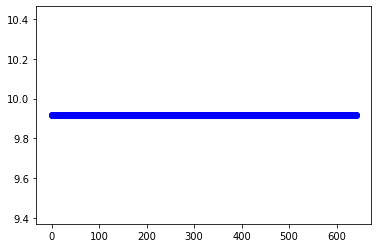

In [ ]:
#plt.plot(rotacao[subida[subida.shape[0]-2]:],'bo')
plt.plot(rotacao[35093:],'bo')
#plt.plot(tabela[subida[subida.shape[0]-2]:subida[subida.shape[0]-1],2])

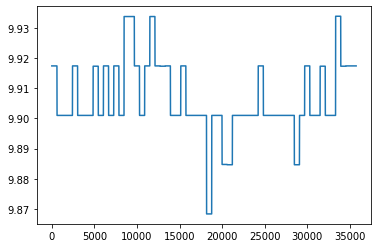

In [ ]:
plt.plot(rotacao)

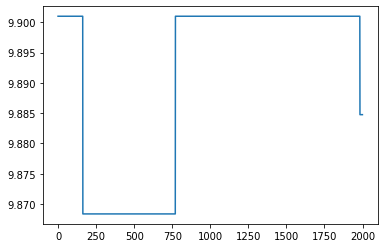

In [ ]:
plt.plot(rotacao[18000:20000])

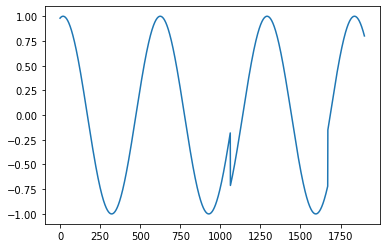

In [ ]:
plt.plot(senoide[17100:19000])

In [ ]:
rotacao.shape

(35701,)

Concatenar rotação senoidal na tabela de dados

In [ ]:
tabela2 = dados1[:14500] #limitando em 14500 pontos

In [ ]:
print(tabela2)

[[ 1.000000e+00  1.670000e-04  1.000000e+00 ... -1.409290e-01
   4.482210e-01 -1.522400e-01]
 [ 2.000000e+00  3.330000e-04  1.000000e+00 ... -3.515580e-01
   4.610810e-01 -5.355800e-02]
 [ 3.000000e+00  5.000000e-04  1.000000e+00 ... -5.510190e-01
   3.237110e-01  1.208210e-01]
 ...
 [ 1.449800e+04  2.416333e+00  0.000000e+00 ...  6.233500e-02
   3.079450e-01  1.465010e-01]
 [ 1.449900e+04  2.416500e+00  0.000000e+00 ...  8.286900e-02
   3.159790e-01  1.614570e-01]
 [ 1.450000e+04  2.416667e+00  0.000000e+00 ...  9.087100e-02
   3.043480e-01  1.694370e-01]]


In [ ]:
tabela2.shape

(14500, 11)

In [ ]:
tabela3 = np.column_stack((tabela2, senoide[:14500]))

In [ ]:
print(tabela3)

[[ 1.00000000e+00  1.67000000e-04  1.00000000e+00 ...  4.48221000e-01
  -1.52240000e-01  1.04057408e-02]
 [ 2.00000000e+00  3.33000000e-04  1.00000000e+00 ...  4.61081000e-01
  -5.35580000e-02  2.07480574e-02]
 [ 3.00000000e+00  5.00000000e-04  1.00000000e+00 ...  3.23711000e-01
   1.20821000e-01  3.11504349e-02]
 ...
 [ 1.44980000e+04  2.41633300e+00  0.00000000e+00 ...  3.07945000e-01
   1.46501000e-01 -4.63016528e-01]
 [ 1.44990000e+04  2.41650000e+00  0.00000000e+00 ...  3.15979000e-01
   1.61457000e-01 -4.53783667e-01]
 [ 1.45000000e+04  2.41666700e+00  0.00000000e+00 ...  3.04348000e-01
   1.69437000e-01 -4.44501832e-01]]


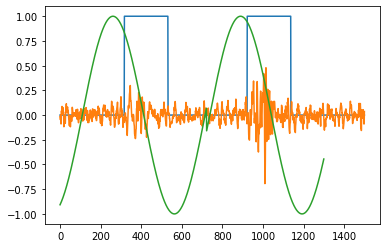

In [ ]:
plt.plot(tabela3[13000:,2])
plt.plot(tabela3[13000:,6])
plt.plot(tabela3[13200:,11])

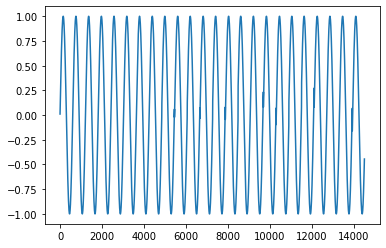

In [ ]:
plt.plot(tabela3[0:,11])

## Salvar os dados

In [ ]:
np.savetxt('/content/drive/My Drive/Dados concatenados/Baseline_sen10Hz_001.csv',tabela3,
               delimiter=',')